# Introdução a JGRAPHT Python

Este notebook apresenta, algumas atividades básicas para criação de grafos usando a API [JGraphT](https://jgrapht.org/).

JGraphT é uma biblioteca em Java que dá suporte a implementação de diferentes tipos de grafos e inclui a implementação de vários algoritmos para solução de problemas usando grafos. Neste curso, utilizaremos a versão **Python bindings**
cuja documentação encontra-se no link abaixo:

https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/

*Atenção:* Os blocos de código neste roteiro, especialmente referentes a instalação e importação e definições auxiliares, devem ser executados na sequência em que são apresentados abaixo, antes de cada uso deste notebook, a fim de garantir que as definições necessárias em cada trecho foram devidamente importadas/criadas.

# Instalação e Importação de Pacotes e Arquivos


Python bindings pode ser instalado usando pip no escopo de qualquer interpretador python.
Abaixo, temos a instalação para este notebook e a importação de bibliotecas e arquivos que usaremos a seguir.

In [ ]:
# Instalando a JgraphT para uso neste notebook
!pip install jgrapht

# Importando a JgraphT
import jgrapht

# Importanto funções para print de vértices e arestas
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
from drawutil import draw_graph
from importutil import import_gml,read_multiple_CSV

# Download de arquivos de grafos usados neste notebook
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/bp1.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/cubo.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/acyclic.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/K5.gml
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/estados.csv
!wget https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/graphs/fronteiras.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.4 MB/s 
--2022-10-08 11:03:13--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/drawutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6783 (6.6K) [text/plain]
Saving to: ‘drawutil.py’

drawutil.py         100%[===================>]   6.62K  --.-KB/s    in 0s      

2022-10-08 11:03:13 (81.5 MB/s) - ‘drawutil.py’ saved [6783/6783]

--2022-10-08 11:03:13--  https://raw.githubusercontent.com/pdlmachado/GraphTheory-JGraphT/master/src/main/java/python/importutil.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 18

# Grafo Simples

Na JGraphT, um grafo é um objeto do tipo [Graph](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/interfaces.html#graph). Neste curso, utilizaremos apenas *Integer Graphs*, nos quais os vértices e arestas são representados por identificadores do tipo **int**. As arestas possuem atributos básicos representados através da tupla (*source*, *target*, *weight*), onde *source* e *target* são os terminais e *weight* é um valor numérico representando o peso. Para grafos não-direcionados, tanto faz um vértice ser definido como *source* ou *target*, já que a direção do relacionamento não importa. Desta forma, as arestas (a,b) e (b,a) são consideradas iguais.  Para grafos que não são ponderados, o peso é igual a 1.0 por default e não pode ter seu valor modificado. Estudaremos grafos direcionados e ponderados em aulas posteriores.

Grafos são criados através de uma única função: [create_graph](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/graph_factories.html#jgrapht.create_graph).
Este método possui parâmetros que nos permite customizar o tipo de grafo que estamos criando. Para criar um grafo simples, devemos manter *allowing_self_loops=False* e *allowing_multiple_edges=False*. Por ser um grafo não-direcionado sem peso, devemos definir *directed=False* e *weighted=False*.
O método retorna um grafo nulo.

Para adicionar vértices e arestas, podemos invocar métodos disponíveis na interface [Graph](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/interfaces.html#graph), tais como **add_vertex**, **add_vertices_from**, **add_edge** e **add_edges_from**, ilustrados no código abaixo. Quando o identificador de arestas não é passado como argumento, este é atribuído automaticamente com valores a partir de 0.

Para ter acesso aos conjuntos de vértices e arestas criados, podemos invocar os métodos **vertices** e **edges** sobre o objeto grafo. Estes métodos retornam um conjunto com os identificadores dos vértices e arestas criados, respectivamente. Note que para obter os terminais de uma aresta, precisamos invocar os métodos **edge_source** e **edge_target** passando como parâmetro o identificador da aresta. Ou então podemos utilizar o método edge_tuple para obter a tupla completa com os atributos das arestas.

Vértices: {0, 1, 2, 3}
Arestas: {0, 1, 2, 3}
Função de Incidência: 
  ψ(0)={0,1}   ψ(1)={0,3}   ψ(2)={1,3}   ψ(3)={2,3} 
Quantidade de Vértices: 4
Quantidade de Arestas: 4


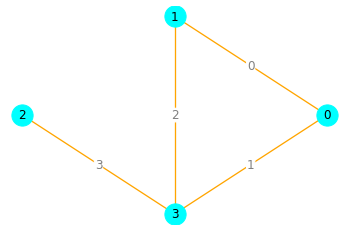

In [ ]:
#@title  { run: "auto", vertical-output: true, display-mode: "both" }
g1 = jgrapht.create_graph(directed=False, weighted=False)

# Adicionando vértices 1 a 1
g1.add_vertex(0)

# Adicionando vértices a partir de uma coleção
g1.add_vertices_from([1,2,3])

# Imprimindo o conjunto de vértices
print(f'Vértices: {g1.vertices}')

# Adicionando as arestas 1 a 1
g1.add_edge(0,1)
# Adicionando as arestas a partir de uma coleção
g1.add_edges_from([(0,3),(1,3),(2,3)])

# Imprimfindo o conjunto de arestas
print(f"Arestas: {g1.edges}")
# Imprimindo arestas como tuplas onde o primeiro elemento é o id da aresta e
# os elementos seguintes são os terminais das arestas
print("Função de Incidência: ")
for e in g1.edges:
  print(f'  \u03C8({(e)})={{{g1.edge_source(e)},{g1.edge_target(e)}}}', end=" ")

# Imprimindo alguns atributos do grafo usando definições da interface Graph
print("\nQuantidade de Vértices: {}".format(g1.number_of_vertices))
print("Quantidade de Arestas: {}".format(g1.number_of_edges))

# Desenhando o grafo usando função de drawutil.py
draw_graph(g1,vertexid_aslabel=True,edgeid_aslabel=True)



A interface *Graph* também disponibiliza métodos para consultarmos se vértices estão ou não relacionados (*contains_edge_between*, *edges_between*), de quais arestas um vértice é terminal (*edges_of*), qual é o outro vértice terminal de uma aresta (*opposite*) e o grau de um vértice (*degree_of*), dentre outras. Existem outras funções especializadas para grafos direcionados e grafos ponderados. Abaixo, ilustram os um teste para mostrar que em grafos não-direcionados a ordem dos terminais não importa.

In [ ]:
# Testando se os vértices 0 e 1 estão relacionados no grafo g criado acima.
# (execute o código anterior antes deste para criar o grafo)
# Observe que tanto faz testar a aresta (1,0) quanto (0,1) já
# que o grafo é não direcionado.
if (g1.contains_edge_between(0,1) and g1.contains_edge_between(1,0)):
  print(True)

True


# Multigrafo

Para criar um multigrafo, definimos o parâmetro *allowing_multiple_edges=True* e *allowing_self_loops=False* quando invocamos *create_graph*.

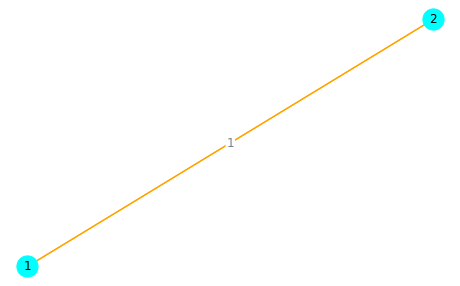

2


In [ ]:
# Crie aqui o seu multigrafo
g1 = jgrapht.create_graph(directed=False, weighted=False, allowing_multiple_edges=True, allowing_self_loops=False)

g1.add_vertices_from([1,2])

g1.add_edges_from([(1,2),(2,1)])

draw_graph(g1,vertexid_aslabel=True,edgeid_aslabel=True)

print(g1.number_of_edges)

# Pseudografo

Para criar um multigrafo, definimos o parâmetro *allowing_multiple_edges=True* e *allowing_self_loops=True* quando invocamos *create_graph*.

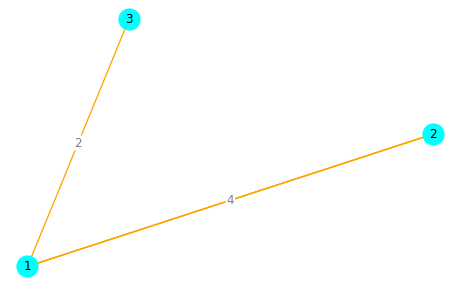

5


In [ ]:
# Crie aqui o seu pseudografo
g1 = jgrapht.create_graph(directed=False, weighted=False,allowing_multiple_edges=True, allowing_self_loops=True)

g1.add_vertices_from([1,2,3])

g1.add_edges_from([(1,1),(1,2),(1,3),(1,2),(2,1)])

draw_graph(g1,vertexid_aslabel=True,edgeid_aslabel=True)

print(g1.number_of_edges)

# Grafos simples com atributos em vértices e arestas

Para definirmos atributos para vértices e arestas, criamos dicionários de atributos onde as chaves são os identificadores dos vértices/arestas no grafo e, para cada vértice/aresta, existe um dicionário com chaves/valores dos seus atributos.
Note que estes dicionários não fazem parte do objeto grafo. Portanto, se alguma função precisa considerar estas informações, estes dicionários precisam ser fornecidos como entrada.

Vértices: {0: 'a', 1: 'b', 2: 'c', 3: 'd'}
Arestas: {0: 'ab', 1: 'bc', 2: 'ad', 3: 'bd', 4: 'cd'}
ψ(0)={0,1} ψ(1)={1,2} ψ(2)={0,3} ψ(3)={1,3} ψ(4)={2,3} 

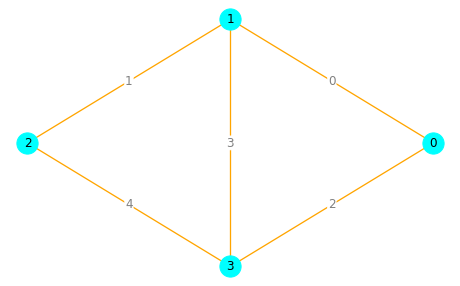

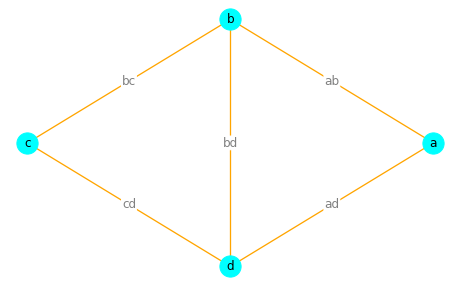

In [ ]:
#@title  { run: "auto", vertical-output: true }
g2 = jgrapht.create_graph(directed=False, weighted=False)

# Dicionário de atributos dos vértices
v_g2 = {
    0 : {'label': 'a', 'color': 'grey'},
    1 : {'label': 'b', 'color': 'blue'},
    2 : {'label': 'c', 'color': 'green'},
    3 : {'label': 'd', 'color': 'red'}
}
# Dicionário de atributos das arestas
e_g2 = {
    0 : {'label' : 'ab'},
    1 : {'label' : 'bc'},
    2 : {'label' : 'ad'},
    3 : {'label' : 'bd'},
    4 : {'label' : 'cd'}
}

# Adicionando vértices ao grafo
g2.add_vertices_from([x for x in range(0,4)])

# Adicionando as arestas 1 a 1
g2.add_edge(0,1,edge=0)
g2.add_edge(1,2,edge=1)
g2.add_edge(0,3,edge=2)
g2.add_edge(1,3,edge=3)
g2.add_edge(2,3,edge=4)

print(f'Vértices: ', end="")
print({v:v_g2[v]['label'] for v in g2.vertices})
print(f'Arestas: ', end="")
print({e:e_g2[e]['label'] for e in g2.edges})
for e in g2.edges:
  print(f'\u03C8({(e)})={{{g2.edge_source(e)},{g2.edge_target(e)}}}', end=" ")

# Desenhando o grafo considerando os labels dos vértices e arestas
draw_graph(g2,vertexid_aslabel=True, edgeid_aslabel=True)
draw_graph(g2,vlabel='label',v_attrs=v_g2,
              elabel='label',e_attrs=e_g2)


# Importando Grafos no formato GML

Criar grafos adicionando vértices e arestas um a um é uma tarefa cansativa e inviável para grafos maiores. Assim, a melhor abordagem é criar grafos usando outras ferramentas tais como a [yEd](https://www.yworks.com/products/yed)  (versão online da yEd: https://www.yworks.com/yed-live/) ou mesmo editores de texto e planilhas eletrônicas e exportá-los para serem carregados no seu programa JGraphT.

Para importar um grafo no formato GML, a JGraphT disponibiliza a função [parse_gml](https://python-jgrapht.readthedocs.io/en/jgrapht-1.5.0.3/api/io/importers.html#jgrapht.io.importers.parse_gml). Por simplicidade, iremos utilizar a função **import_gml** que faz parte do pacote *importutil.py* que está anexado neste notebook.

A função **import_gml** possui os seguintes parâmetros:

- *g* - instância do grafo (grafo nulo)
- *v_attrs* - instância (vazia) do dicionário de atributos de vértices
- *e_attrs* - instância (vazia) do dicionário de atributos de arestas
- *filename* - nome do arquivo com a definição do grafo
- *weights_aslabel* - indica se o valor do atributo 'label' deve ser usado como peso para o grafo.

A seguir, temos um exemplo. Considere os grafos disponíveis no formulário à direita.

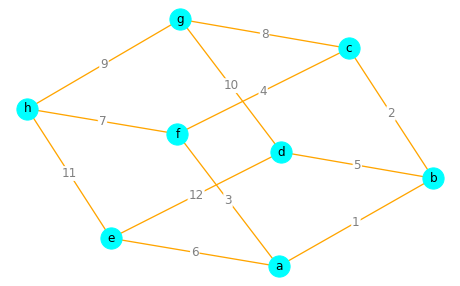

Vértices: {0, 1, 2, 3, 4, 5, 6, 7}
Atributos de Vértices: {0: {'ID': '0', 'LabelGraphics': '[ text "e" fontSize 12 fontName "Dialog" anchor "c" ]', 'label': 'e', 'graphics': '[ x 343.0 y 191.0 w 30.0 h 30.0 type "rectangle" raisedBorder 0 fill "#FFCC00" outline "#000000" ]'}, 1: {'ID': '1', 'LabelGraphics': '[ text "d" fontSize 12 fontName "Dialog" anchor "c" ]', 'label': 'd', 'graphics': '[ x 499.0 y 191.0 w 30.0 h 30.0 type "rectangle" raisedBorder 0 fill "#FFCC00" outline "#000000" ]'}, 2: {'ID': '2', 'LabelGraphics': '[ text "a" fontSize 12 fontName "Dialog" anchor "c" ]', 'label': 'a', 'graphics': '[ x 434.0 y 99.0 w 30.0 h 30.0 type "rectangle" raisedBorder 0 fill "#FFCC00" outline "#000000" ]'}, 3: {'ID': '3', 'LabelGraphics': '[ text "b" fontSize 12 fontName "Dialog" anchor "c" ]', 'label': 'b', 'graphics': '[ x 594.0 y 99.0 w 30.0 h 30.0 type "rectangle" raisedBorder 0 fill "#FFCC00" outline "#000000" ]'}, 4: {'ID': '4', 'LabelGraphics': '[ text "c" fontSize 12 fontName "Dialo

In [ ]:
#@title  { run: "auto", vertical-output: true }
filename = "cubo.gml" #@param ["bp1.gml", "cubo.gml", "acyclic.gml", "K5.gml"]
layout = "fruchterman_reingold" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

# Criando os dicionários
v_g3 = {} # atributos de vértices
e_g3 = {} # atributos de arestas

# Criando instancia do grafo a ser importado
g3 = jgrapht.create_graph(directed=False)

# Usando a função auxiliar import_gml
import_gml(g3,v_g3,e_g3,filename)

draw_graph(g3,layout,
           vlabel='label',v_attrs=v_g3,
           elabel='label',e_attrs=e_g3)

print(f'Vértices: {g3.vertices}')
print(f'Atributos de Vértices: {v_g3}')

print(f'\nArestas: {g3.edges}')
print(f'Atributos de Arestas: {e_g3}')

print(f'\nAtributos do Grafo: {g3.type}')


In [ ]:
# Por questões de otimização, pode ser importante usar um dicionário mais simples
# Criando dicionários só com o atributo label
v_g3_l = {v:{key: v_g3[v][key] for key in v_g3[v].keys()&{'label'}} for v in g3.vertices}
print(v_g3_l)
e_g3_l = {e:{key: e_g3[e][key] for key in e_g3[e].keys()&{'label'}} for e in g3.edges}
print(e_g3_l)


{0: {'label': 'e'}, 1: {'label': 'd'}, 2: {'label': 'a'}, 3: {'label': 'b'}, 4: {'label': 'c'}, 5: {'label': 'f'}, 6: {'label': 'h'}, 7: {'label': 'g'}}
{0: {'label': '11'}, 1: {'label': '9'}, 2: {'label': '10'}, 3: {'label': '12'}, 4: {'label': '3'}, 5: {'label': '1'}, 6: {'label': '2'}, 7: {'label': '4'}, 8: {'label': '6'}, 9: {'label': '5'}, 10: {'label': '8'}, 11: {'label': '7'}}


# Importando grafos a partir de Tabelas no formato CSV

---



No mundo real, grafos são criados a partir de bases de dados, onde vértices e arestas são objetos que possuem diferentes atributos. Neste caso, um dos formatos de entrada mais utilizados é o CSV, onde a primeira linha lista os nomes dos atributos separados por um delimitador, usualmente a vírgula, e as demais apresentam os dados, também separados por um delimitador. Neste caso, poderemos ter um ou mais arquivos para representar vértices e arestas a serem criados.

Vértices: {1, 2, 3, 4, 5, 6, 7, 8, 9}
Atributos dos vértices: {1: {'Sigla': 'MA', 'Nome': 'Maranhão', 'Litoral': 'true', 'label': 'Maranhão'}, 2: {'Sigla': 'PI', 'Nome': 'Piauí', 'Litoral': 'true', 'label': 'Piauí'}, 3: {'Sigla': 'CE', 'Nome': 'Ceará', 'Litoral': 'true', 'label': 'Ceará'}, 4: {'Sigla': 'RN', 'Nome': 'R.Norte', 'Litoral': 'true', 'label': 'R.Norte'}, 5: {'Sigla': 'PB', 'Nome': 'Paraíba', 'Litoral': 'true', 'label': 'Paraíba'}, 6: {'Sigla': 'PE', 'Nome': 'Pernambuco', 'Litoral': 'true', 'label': 'Pernambuco'}, 7: {'Sigla': 'AL', 'Nome': 'Alagoas', 'Litoral': 'true', 'label': 'Alagoas'}, 8: {'Sigla': 'SE', 'Nome': 'Sergipe', 'Litoral': 'true', 'label': 'Sergipe'}, 9: {'Sigla': 'BA', 'Nome': 'Bahia', 'Litoral': 'true', 'label': 'Bahia'}}
Arestas: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
Atributos das arestas: {0: {'Distancia': '329'}, 1: {'Distancia': '495'}, 2: {'Distancia': '934'}, 3: {'Distancia': '994'}, 4: {'Distancia': '629'}, 5: {'Distancia': '688'}, 6: {'Dist

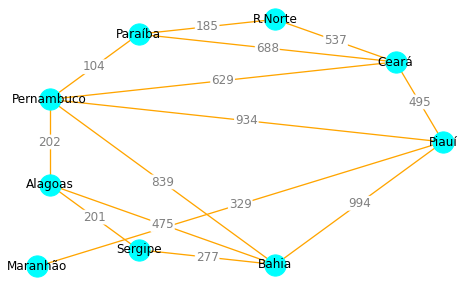

In [ ]:
#@title  { run: "auto", vertical-output: true }
layout = "circular" #@param ["random", "circular", "fruchterman_reingold", "fruchterman_reingold_indexed"]

# Criando a instância do grafo e dicionários de atributos
g4 = jgrapht.create_graph(directed=False)
v_g4 = {}
e_g4 = {}

# Importando o grafo
read_multiple_CSV(g4,v_g4,e_g4,
                  vfilename='estados.csv',vid='Sigla',vlabel='Nome',
                  efilename='fronteiras.csv',
                  esourceid='Estado1',etargetid='Estado2')

# Imprimindo o grafo
print(f'Vértices: {g4.vertices}')
print("Atributos dos vértices: {}".format(v_g4))
print(f'Arestas: {g4.edges}')
print("Atributos das arestas: {}".format(e_g4))

# Visualizando graficamente o grafo csvgraph
draw_graph(g4,layout,
           vlabel='label',v_attrs=v_g4,
           e_attrs=e_g4,elabel='Distancia')
